In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt"
feature_name_df = pd.read_csv(url, sep='\s+', header=None, 
                              names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [4]:
X_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt"
X_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt"

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

X_train.columns = feature_name
X_test.columns = feature_name

In [5]:
y_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt"
y_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt"

y_train = pd.read_csv(y_train_url, sep='\s+', header=None)
y_test = pd.read_csv(y_test_url, sep='\s+', header=None)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [7]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [8]:
HAR_pca, pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

(7352, 2)

In [9]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [10]:
cols = ['pca_'+str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [18]:
# pca 결과를 저장하는 함수

def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_'+str(n) for n in range(pca.components_.shape[0])]
    return pd.DataFrame(pca_data, columns=cols)

In [19]:
# components 2개
HAR_pca, pca = get_pca_data(X_train, n_components=2)
# pca 결과 정리
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
# y에 action값 넣기
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,action
0,-5.520280,-0.290277,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


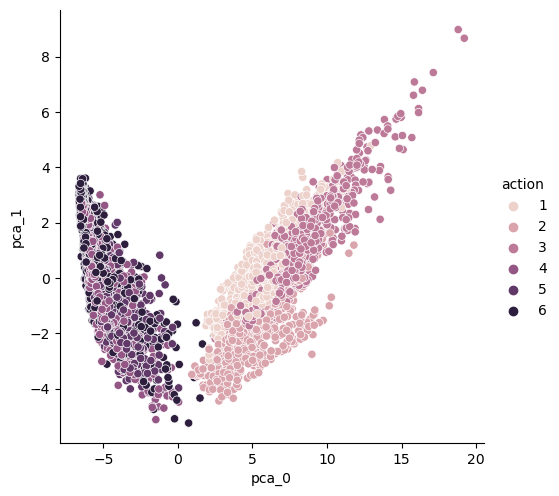

In [20]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue='action', height=5, x_vars=['pca_0'], y_vars=['pca_1']);

- 생각보다 구분이 잘 안간다

In [21]:
# 전체 500개가 넘는 특성을 두개로 줄임

import numpy as np

def print_variance_ratio(pca):
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))

print_variance_ratio(pca)

variance_ratio :  [0.6255444  0.04913023]
sum of variance_ratio :  0.6746746270487842


- 컴포넌트 3개는?

In [22]:
# components 3개
HAR_pca, pca = get_pca_data(X_train, n_components=3)
# pca 결과 정리
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
# y에 action값 넣기
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290277,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5


In [23]:
print_variance_ratio(pca)

variance_ratio :  [0.6255444  0.04913023 0.04121467]
sum of variance_ratio :  0.7158893015785959


In [24]:
# 10개는? 80프로까지 상승함

HAR_pca, pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
print_variance_ratio(pca)

variance_ratio :  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969379 0.00858014]
sum of variance_ratio :  0.8050386668682497


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12],
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1,))


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [27]:
# 성능은 조금 나쁘다

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [28]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators' ,'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
17,1,0.838547,200,8
14,1,0.838547,200,8
1,3,0.837867,100,6
4,3,0.837867,100,6
32,5,0.837051,200,10


- 테스트 데이터에 적용해보자

In [29]:
# 여기서 중요한 것은 test데이터는 절대 먼저 fit시키거나 하면 오염될 수 있다. 
# train 데이터를 pca에 통과시켜서 파라미터들을 잡아놓은 후 test 데이터를 pca에 transform 시키고 predict해야한다

from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1,))

pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8534102477095351

In [5]:
# 밑의 xgboost하려고 y_train 다시 잡아줌

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

In [6]:
# 혹시나 하고 해보았지만 역시나 커넬이 죽었다

# %%time

# from xgboost import XGBClassifier

# evals = [(pca.transform(X_test), y_test)]

# xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
# xgb.fit(HAR_pca, y_train.reshape(-1,), early_stopping_rounds=10, eval_set=evals)

In [7]:
# y_train 다시 되돌리기

# y_train = le.inverse_transform(y_train)